In [1]:
from deepethogram import projects

# this is a path to a base directory on your hard drive
# this is just an example! change this to whereever you want, e.g. 'C:\DATA\movies`
data_path = '/home/yi/Sunze/'

# pick a project name
project_name = 'mouse_pain_4'

# make a list of behaviors. try to choose your behaviors carefully! 
# you'll have to re-train all your models if you add or remove behaviors. 
# behaviors = ['background',
#             'left_hindpaw_biting/licking',
#             'right_hindpaw_biting/licking',
#             'left_hindpaw_lifting',
#             'right_hindpaw_lifting',
#             'left_hindlimb_licking',
#             'right_hindlimb_licking',
#             'genital_licking',
#             'bout_of_hindpaw_scratchingandbiting',
#             'left_forepaw_licking',
#             'right_forepaw_licking',
#             'left_forepaw_lifting_or_suspending',
#             'right_forepaw_lifting_or_suspending',
#             'rearing_against_wall',
#             'free_rearing',
#             'face_grooming',
#             'back_grooming',
#             'belly_grooming',
#             'tail_grooming']
behaviors = ['background',
             'left_hindpaw_biting/licking',
            'right_hindpaw_biting/licking',
            'genital_licking',
            'bout_of_hindpaw_scratchingandbiting']

# this will create a folder called /mnt/DATA/open_field_deepethogram
# there will be subdirectories called DATA and models
# there will also be a project_config.yaml
project_config = projects.initialize_project(data_path, project_name, behaviors)

In [ ]:
import glob

# adding videos
list_of_movies = glob.glob('/freespace/local/yi/Data/*.avi')


mode = 'copy' # or 'symlink' or 'move'

# depending on the mode, it will copy, symlink, or move each video file
# it will also compute the mean and standard deviation of each RGB channel
for movie_path in list_of_movies:
    projects.add_video_to_project(project_config, movie_path, mode=mode)

In [15]:
os.path.basename(label_path)

'65_1_3wk_body_Sunze.csv'

In [16]:
import os
import pandas as pd

# now, we have our new movie files properly in our deepethogram project
project_path = os.path.join(data_path, project_name+'_deepethogram')

new_list_of_movies = glob.glob(os.path.join(project_path, 'DATA', '*', '*.avi'))
new_list_of_movies.sort()

# we also have a list of label files, created by some other means
list_of_labels = glob.glob('/freespace/local/yi/Data/*.csv')
list_of_labels.sort()

# for movie_path, label_path in zip(new_list_of_movies, list_of_labels):
#     print(movie_path, label_path)
#     projects.add_label_to_project(label_path, movie_path)

for label_path in list_of_labels:
    df = pd.read_csv(label_path)
    background = []
    for ind, row in df.iterrows():
        background.append(int(row.any()))
    df.insert(loc=0, column='background', value=background) 
    save_path = os.path.join(project_path, 'DATA', os.path.splitext(os.path.basename(label_path))[0].strip('_Sunze'), os.path.basename(label_path))
    print(save_path)
    df.to_csv(save_path, index=True)

/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_1_3wk_body/65_1_3wk_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_2_2wk_body/65_2_2wk_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_2_3wk_body/65_2_3wk_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_2_4wk_body/65_2_4wk_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_3_2wk_body/65_3_2wk_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_3_3wk_body/65_3_3wk_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_4_2wk_body/65_4_2wk_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_4_3wk_body/65_4_3wk_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_5_2wk_body/65_5_2wk_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_5_3wk_body/65_5_3wk_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/776_1_3w_body/776_1_3w_body_Sunze.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/987_1_3w_body/987_1_3w_body_Su

In [10]:
# remove label files if necessary
new_list_of_labels = glob.glob(os.path.join(project_path, 'DATA', '*', '*.csv'))
for name in new_list_of_labels:
    os.remove(name)

In [56]:
# clean data dir
import shutil

search_path = os.path.join(project_path, 'DATA', '*', '.ipynb_checkpoints')
print(search_path)
ignore = glob.glob(search_path)
print(ignore)
for name in ignore:
    print('removing {}...'.format(name))
    shutil.rmtree(name)
    
search_path = os.path.join(project_path, 'DATA1', '*', '.ipynb_checkpoints')
print(search_path)
ignore = glob.glob(search_path)
print(ignore)
for name in ignore:
    print('removing {}...'.format(name))
    shutil.rmtree(name)
    
search_path = os.path.join(project_path, 'DATA', '.ipynb_checkpoints')
print(search_path)
ignore = glob.glob(search_path)
print(ignore)
for name in ignore:
    print('removing {}...'.format(name))
    shutil.rmtree(name)
    
search_path = os.path.join(project_path, 'DATA1', '.ipynb_checkpoints')
print(search_path)
ignore = glob.glob(search_path)
print(ignore)
for name in ignore:
    print('removing {}...'.format(name))
    shutil.rmtree(name)

/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/*/.ipynb_checkpoints
[]
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA1/*/.ipynb_checkpoints
['/home/yi/Sunze/mouse_pain_4_deepethogram/DATA1/73_2_4wk_body/.ipynb_checkpoints']
removing /home/yi/Sunze/mouse_pain_4_deepethogram/DATA1/73_2_4wk_body/.ipynb_checkpoints...
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/.ipynb_checkpoints
[]
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA1/.ipynb_checkpoints
[]


In [41]:
# rename all label files
new_list_of_labels = glob.glob(os.path.join(project_path, 'DATA', '*', '*.csv'))
for name in new_list_of_labels:
    new_name = name.replace('Sunze', 'Yihan', 1).replace('Sunze', 'labels').replace('Yihan', 'Sunze')
    print('{} -> {}'.format(name, new_name))
    os.rename(name, new_name)

/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_2_3wk_body/65_2_3wk_body_Sunze.csv -> /home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_2_3wk_body/65_2_3wk_body_labels.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/776_1_3w_body/776_1_3w_body_Sunze.csv -> /home/yi/Sunze/mouse_pain_4_deepethogram/DATA/776_1_3w_body/776_1_3w_body_labels.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_1_3wk_body/65_1_3wk_body_Sunze.csv -> /home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_1_3wk_body/65_1_3wk_body_labels.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_4_2wk_body/65_4_2wk_body_Sunze.csv -> /home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_4_2wk_body/65_4_2wk_body_labels.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_2_2wk_body/65_2_2wk_body_Sunze.csv -> /home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_2_2wk_body/65_2_2wk_body_labels.csv
/home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_3_2wk_body/65_3_2wk_body_Sunze.csv -> /home/yi/Sunze/mouse_pain_4_deepethogram/DATA/65_3_2w

In [62]:
df = pd.read_csv('mouse_pain_4_deepethogram/DATA1/65_3_4wk_body/65_3_4wk_body_labels.csv')
df1 = pd.read_csv('/freespace/local/yi/test/65_3_4wk_body_Sunze.csv')

In [60]:
import matplotlib.pyplot as plt

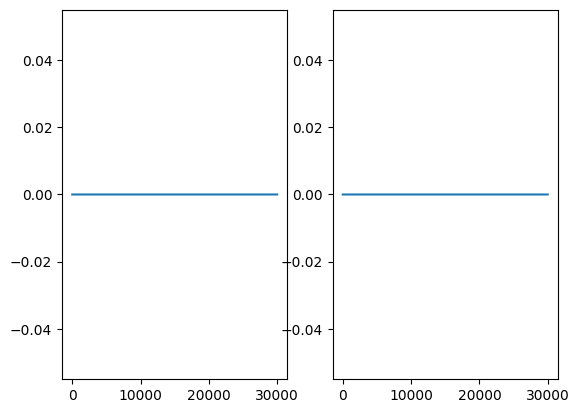

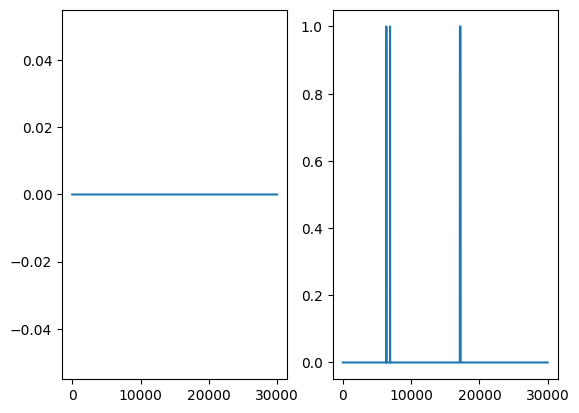

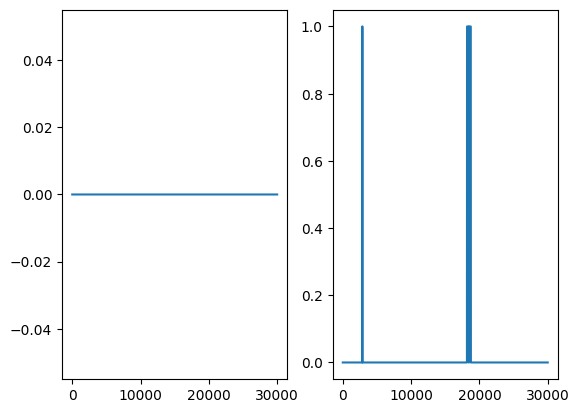

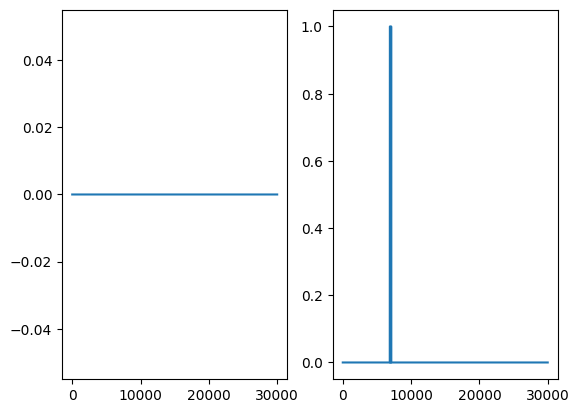

In [68]:
for col in df.columns[2:]:
    plt.figure()
    plt.subplot(121)
    plt.plot(df[col])
    plt.subplot(122)
    plt.plot(df1[col])